# Churn Prediction Models on Bank Customers
Project by Serap YALÇIN and Hodan YUSUF

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import date
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc


In [2]:
#Data is consist of two part so lets merge them.

data1 = pd.read_csv("C:\\Users\\budaks\\Desktop\\\Güz 2019 YL\\Data Engineering\\Term Project\\Bank Project Data\\TrainTest1.csv", sep=";", header=None)
data2 = pd.read_csv("C:\\Users\\budaks\\Desktop\\\Güz 2019 YL\\Data Engineering\\Term Project\\Bank Project Data\\TrainTest2.csv", sep=";", header=None)

data=pd.concat([data1, data2])

print("Number of rows is", len(data))

data.head()

Number of rows is 1952960


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,1,2016-01-22 15:03:33.343,Kayıt Onaylandı ...,1980-03-29 00:00:00,Yerli,Erkek ...,Bosanmis ...,P,0.0,...,3.37,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,2,2,2016-01-22 15:03:33.300,Kayıt Onaylandı ...,1991-02-12 00:00:00,Yerli,Erkek ...,Bekar ...,P,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,3,3,2016-01-22 15:03:33.250,Kayıt Onaylandı ...,1984-09-23 00:00:00,Yerli,Erkek ...,Bekar ...,P,0.0,...,0.20,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0
3,4,4,2016-01-22 15:03:33.180,Kayıt Onaylandı ...,1971-10-01 00:00:00,Yerli,Erkek ...,Evli ...,P,0.0,...,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,5,5,2016-01-22 15:03:33.127,Kayıt Onaylandı ...,1985-09-10 00:00:00,Yerli,Erkek ...,Bekar ...,P,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952960 entries, 0 to 952961
Data columns (total 24 columns):
0     int64
1     int64
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    int64
22    int64
23    int64
dtypes: float64(12), int64(5), object(7)
memory usage: 372.5+ MB


In [4]:
#Define columns name.

columns=["Row","AccountNumber","RecordingTime","State","BirthDate","CitizenshipName","GenderName","MaritalStatusName",
         "ValueSegment","Risk201806","Risk201812","Risk201906","Cari201806","Cari201812","Cari201906",
         "Katilim201806", "Katilim201812","Katilim201906", "Kart201806","Kart201812","Kart201906",
         "AktifUrunSayisi201806", "AktifUrunSayisi201812","AktifUrunSayisi201906"]

data.columns=columns

In [5]:
#Select necessary columns.

data=data[["RecordingTime","State","BirthDate","CitizenshipName","GenderName","MaritalStatusName",
         "ValueSegment","Risk201806","Risk201812","Risk201906","Cari201806","Cari201812","Cari201906",
         "Katilim201806", "Katilim201812","Katilim201906", "Kart201806","Kart201812","Kart201906",
         "AktifUrunSayisi201806", "AktifUrunSayisi201812","AktifUrunSayisi201906"]]

#Deleted customers, in which both churn and not-churn class, are dropped from our dataset so that there are not in churn definitions. 

data=data[data["State"]!="Silme Onaylandı                                                                                    "]
data=data[data["State"]!="Silme Onay Bekliyor                                                                                "]
data=data[data["MaritalStatusName"]!="Evliligin Feshi                                                                                    "]
data=data[data["MaritalStatusName"]!="Diğer                                                                                              "]
data=data[data["MaritalStatusName"]!="Evliligin iptali"]

#Drop nulls from data. Number of them is trivial. We still have about 1.9 million customers

data=data.dropna()

data=data.set_index(np.arange(0, len(data)), drop=False)

print("Number of rows is", len(data))
data.head()


Number of rows is 1933005


,RecordingTime,State,BirthDate,CitizenshipName,GenderName,MaritalStatusName,ValueSegment,Risk201806,Risk201812,Risk201906,...,Cari201906,Katilim201806,Katilim201812,Katilim201906,Kart201806,Kart201812,Kart201906,AktifUrunSayisi201806,AktifUrunSayisi201812,AktifUrunSayisi201906
0,2016-01-22 15:03:33.343,Kayıt Onaylandı ...,1980-03-29 00:00:00,Yerli,Erkek ...,Bosanmis ...,P,0.0,0.0,0.0,...,3.37,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,2016-01-22 15:03:33.300,Kayıt Onaylandı ...,1991-02-12 00:00:00,Yerli,Erkek ...,Bekar ...,P,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,2016-01-22 15:03:33.250,Kayıt Onaylandı ...,1984-09-23 00:00:00,Yerli,Erkek ...,Bekar ...,P,0.0,0.0,0.0,...,0.20,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0
3,2016-01-22 15:03:33.180,Kayıt Onaylandı ...,1971-10-01 00:00:00,Yerli,Erkek ...,Evli ...,P,0.0,0.0,0.0,...,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,2016-01-22 15:03:33.127,Kayıt Onaylandı ...,1985-09-10 00:00:00,Yerli,Erkek ...,Bekar ...,P,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [6]:
#RecordingTime and BirthDate are in string format so converting to date is significant.

new_time = data["RecordingTime"].str.split(" ", n = 1, expand = True)

data["RecordingTime"]=new_time[0]
data["RecordingTime"]=pd.to_datetime(data["RecordingTime"], format='%Y-%m-%d')

new_date = data["BirthDate"].str.split(" ", n = 1, expand = True)
data["BirthDate"]=new_date[0]
data["BirthDate"]=pd.to_datetime(data["BirthDate"], format='%Y-%m-%d')

data[["RecordingTime", "BirthDate"]].head()


,RecordingTime,BirthDate
0,2016-01-22,1980-03-29
1,2016-01-22,1991-02-12
2,2016-01-22,1984-09-23
3,2016-01-22,1971-10-01
4,2016-01-22,1985-09-10


In [7]:
#Age and Tenure are calculated from RecordingTime and BirthDate.

def calculate_age(born):
    today = date.today()
    return today.year - born.year

Age=[]

for i in data["BirthDate"].index:
    Age.append(calculate_age(data["BirthDate"][i]))
    
data["Age"]=Age

Tenure=[]

for i in data["RecordingTime"].index:
    Tenure.append(calculate_age(data["RecordingTime"][i]))
    
data["Tenure"]=Tenure

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933005 entries, 0 to 1933004
Data columns (total 24 columns):
RecordingTime            datetime64[ns]
State                    object
BirthDate                datetime64[ns]
CitizenshipName          object
GenderName               object
MaritalStatusName        object
ValueSegment             object
Risk201806               float64
Risk201812               float64
Risk201906               float64
Cari201806               float64
Cari201812               float64
Cari201906               float64
Katilim201806            float64
Katilim201812            float64
Katilim201906            float64
Kart201806               float64
Kart201812               float64
Kart201906               float64
AktifUrunSayisi201806    int64
AktifUrunSayisi201812    int64
AktifUrunSayisi201906    int64
Age                      int64
Tenure                   int64
dtypes: datetime64[ns](2), float64(12), int64(5), object(5)
memory usage: 368.7+ MB


In [8]:
#Train data covers customers which are recorded between 2015-01-01 and 2019-01-01.
#Test data covers customers which are recorded after 2015-01-01, in other words all customers in dataset.

train_data=data[data["RecordingTime"]<"2019-01-01"]

train_data=train_data[["Tenure","Age","CitizenshipName","GenderName","MaritalStatusName",
                       "ValueSegment","Risk201806","Risk201812","Cari201806","Cari201812",
                       "Katilim201806", "Katilim201812", "Kart201806","Kart201812",
                       "AktifUrunSayisi201806", "AktifUrunSayisi201812"]]

print("Number of rows of train data is", len(train_data))


Number of rows of train data is 1686221


In [9]:
#Create some churn definition based on value segment, loan, deposit, credit card, number of active products of customers.

churn_def1_train=train_data[(train_data["ValueSegment"]=="P") | (train_data["ValueSegment"]=="KP") |
                      ((train_data["Risk201806"]>0) & (train_data["Risk201812"]<100)) |
                      ((train_data["Cari201806"]>0) & (train_data["Cari201812"]<100)) |
                      ((train_data["Katilim201806"]>0) & (train_data["Katilim201812"]<250)) |
                      ((train_data["Kart201806"]>0) & (train_data["Kart201812"]==0)) |
                      ((train_data["AktifUrunSayisi201806"]>0) & (train_data["AktifUrunSayisi201812"]==0))]
len(churn_def1_train)


1030472

In [10]:
churn_def2_train=train_data[(train_data["ValueSegment"]=="KP") |
               ((train_data["Risk201806"]>0) & (train_data["Risk201812"]<100)) |
               ((train_data["Cari201806"]>0) & (train_data["Cari201812"]<100)) |
               ((train_data["Katilim201806"]>0) & (train_data["Katilim201812"]<250)) |
               ((train_data["Kart201806"]>0) & (train_data["Kart201812"]==0)) |
               ((train_data["AktifUrunSayisi201806"]>0) & (train_data["AktifUrunSayisi201812"]==0))]
len(churn_def2_train)

655509

In [11]:
churn_def3_train=train_data[(train_data["ValueSegment"]=="KP") |
               ((train_data["Risk201806"]>0) & (train_data["Risk201812"]==0)) |
               ((train_data["Cari201806"]>0) & (train_data["Cari201812"]==0)) |
               ((train_data["Katilim201806"]>0) & (train_data["Katilim201812"]==0)) |
               ((train_data["Kart201806"]>0) & (train_data["Kart201812"]==0)) |
               ((train_data["AktifUrunSayisi201806"]>0) & (train_data["AktifUrunSayisi201812"]==0))]
len(churn_def3_train)

191905

In [12]:
#Create Churn column and fill out by 0 or 1 according to selected churn definition, which is churn_def2.

train_data["Churn"]=0
train_data["Churn"]=np.where(train_data.isin(churn_def2_train), 1, 0)

#Check number of churn customers based on churn definition.
sum(train_data.Churn)

655509

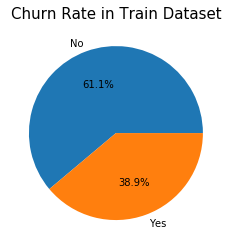

In [13]:
#Calculate and show churn rate in train data.

sizes = train_data['Churn'].value_counts(sort = True)

plt.pie(sizes, labels=["No", "Yes"], autopct='%1.1f%%')
plt.title('Churn Rate in Train Dataset', fontsize=15)
plt.show()

In [14]:
#Train data covers customers which exists between 2015-01-01 and 2019-01-01.
#Test data covers customers which exists after 2015-01-01, in other words all customers in dataset.

test_data=data[["Tenure","Age","CitizenshipName","GenderName","MaritalStatusName",
                "ValueSegment","Risk201812","Risk201906","Cari201812","Cari201906",
                "Katilim201812","Katilim201906","Kart201812","Kart201906",
                "AktifUrunSayisi201812","AktifUrunSayisi201906"]]
print("Number of rows of test data is %d." % len(test_data))

Number of rows of test data is 1933005.


In [15]:
churn_def2_test=test_data[(test_data["ValueSegment"]=="KP") |
               ((test_data["Risk201812"]>0) & (test_data["Risk201906"]<100)) |
               ((test_data["Cari201812"]>0) & (test_data["Cari201906"]<100)) |
               ((test_data["Katilim201812"]>0) & (test_data["Katilim201906"]<250)) |
               ((test_data["Kart201812"]>0) & (test_data["Kart201906"]==0)) |
               ((test_data["AktifUrunSayisi201812"]>0) & (test_data["AktifUrunSayisi201906"]==0))]
len(churn_def2_test)

820071

In [16]:
test_data["Churn"]=0
test_data["Churn"]=np.where(test_data.isin(churn_def2_test), 1, 0)

#Check number of churn customers based on churn definition.
sum(test_data.Churn)

C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


820071

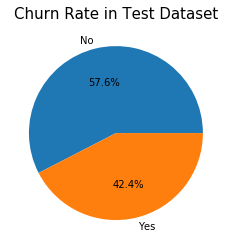

In [17]:
#Calculate and show churn rate in test data.

sizes = test_data['Churn'].value_counts(sort = True)

plt.pie(sizes, labels=["No", "Yes"], autopct='%1.1f%%')
plt.title('Churn Rate in Test Dataset', fontsize=15)
plt.show()


In [18]:
#Since dataset is so large, we can sample randomly.

def frac(dataframe, fraction, other_info=None):
    return dataframe.sample(frac=fraction, random_state=12314)

fraction=0.01
sample_train_data=frac(train_data, fraction)
sample_train_data=pd.get_dummies(sample_train_data, drop_first=True)
print(sample_train_data.columns)


Index(['Tenure', 'Age', 'Risk201806', 'Risk201812', 'Cari201806', 'Cari201812',
       'Katilim201806', 'Katilim201812', 'Kart201806', 'Kart201812',
       'AktifUrunSayisi201806', 'AktifUrunSayisi201812', 'Churn',
       'CitizenshipName_Yerli',
       'GenderName_Kadın                                                                                              ',
       'MaritalStatusName_Bosanmis                                                                                           ',
       'MaritalStatusName_Dul                                                                                                ',
       'MaritalStatusName_Evli                                                                                               ',
       'ValueSegment_A2', 'ValueSegment_B', 'ValueSegment_C', 'ValueSegment_D',
       'ValueSegment_P'],
      dtype='object')


In [19]:
#Random sampling for test data
sample_test_data=frac(test_data, fraction)
sample_test_data=pd.get_dummies(sample_test_data, drop_first=True)
print(sample_test_data.columns)

Index(['Tenure', 'Age', 'Risk201812', 'Risk201906', 'Cari201812', 'Cari201906',
       'Katilim201812', 'Katilim201906', 'Kart201812', 'Kart201906',
       'AktifUrunSayisi201812', 'AktifUrunSayisi201906', 'Churn',
       'CitizenshipName_Yerli',
       'GenderName_Kadın                                                                                              ',
       'MaritalStatusName_Bosanmis                                                                                           ',
       'MaritalStatusName_Dul                                                                                                ',
       'MaritalStatusName_Evli                                                                                               ',
       'ValueSegment_A2', 'ValueSegment_B', 'ValueSegment_C', 'ValueSegment_D',
       'ValueSegment_P', 'ValueSegment_Y'],
      dtype='object')


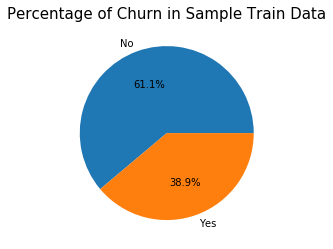

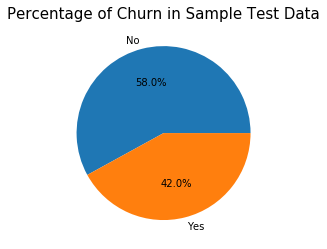

In [20]:
#Calculate and show churn rate in sample train and test data. These are similar with original data.

sizes = sample_train_data['Churn'].value_counts(sort = True)

plt.pie(sizes, labels=["No", "Yes"], autopct='%1.1f%%')
plt.title('Percentage of Churn in Sample Train Data', fontsize=15)
plt.show()

sizes = sample_test_data['Churn'].value_counts(sort = True)

plt.pie(sizes, labels=["No", "Yes"], autopct='%1.1f%%')
plt.title('Percentage of Churn in Sample Test Data', fontsize=15)
plt.show()

In [21]:
#Test data is more than train data since number of customers was increasing by time.

len(sample_test_data)/len(sample_train_data)

1.1463646068082078

In [22]:
#Define input and output of test and train sets.
#ValueSegment_Y is only in test data due to new customers, so this column is also dropped.
#Then, normalize all inputs.

y_train=sample_train_data["Churn"].values

x_train=sample_train_data.drop(labels = ["Risk201806","Cari201806","Katilim201806", "Kart201806",
                                         "AktifUrunSayisi201806",'ValueSegment_A2', 'ValueSegment_B', 'ValueSegment_C',
                                         'ValueSegment_D', 'ValueSegment_P',"Churn"], axis = 1)

x_train=preprocessing.normalize(x_train)


#myscaler = MinMaxScaler()
#myscaler.fit(x_train)
#x_train = myscaler.transform(x_train)

y_test=sample_test_data["Churn"].values
x_test=sample_test_data.drop(labels=["Risk201812","Cari201812","Katilim201812","Kart201812",
                                     "AktifUrunSayisi201812",'ValueSegment_A2', 'ValueSegment_B', 'ValueSegment_C',
                                     'ValueSegment_D', 'ValueSegment_P', 'ValueSegment_Y',"Churn"], axis=1)

x_test=preprocessing.normalize(x_test)

#myscaler = MinMaxScaler()
#myscaler.fit(x_test)
#x_test = myscaler.transform(x_test)

In [23]:
#Set up Logistic Regression model in order to classify churn customers.

model_lr = LogisticRegression()
result = model_lr.fit(x_train, y_train)

parameters = model_lr.coef_

print("Parameters:", parameters)

Parameters: [[ 8.08909466  9.35962371  9.34967036  7.10226781  8.46222559  0.76246595
  -3.52334743 -0.4041367  -0.31691626  0.26922981 -0.20738747  0.91193301]]


C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
#Cross validation 

cv = KFold(n_splits=10, shuffle=False, random_state=42)

for train_index, test_index in cv.split(sample_train_data):
    cv_x_train, cv_x_test = x_train[train_index], x_train[test_index]
    cv_y_train, cv_y_test = y_train[train_index], y_train[test_index]

cv_scores = cross_val_score(model_lr, x_train, y_train, cv=10)
    
print("Cross validation scores:", cv_scores)
print("Average of scores: %%%d" % (np.mean(cv_scores*100)))

C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\

Cross validation scores: [0.77534084 0.7611144  0.74925904 0.75504152 0.77224199 0.75978648
 0.77402135 0.76275208 0.75919336 0.76023739]
Average of scores: %76


C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
#Test model and calculate accuracy.

prediction = model_lr.predict(x_test)

#Accuracy score is %73 which is an acceptable score.

accuracy_lr = metrics.accuracy_score(y_test, prediction)*100

print("Accuracy score is %%%d." % accuracy_lr)

Accuracy score is %73.


<Figure size 432x288 with 0 Axes>

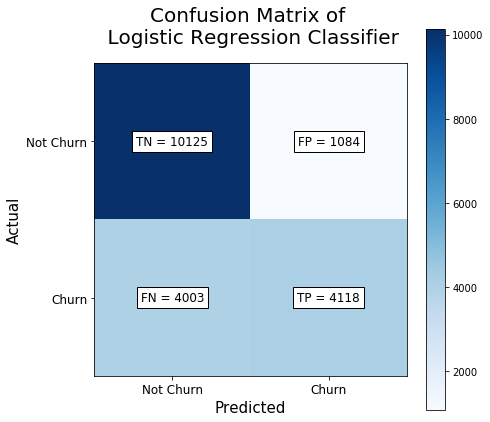

In [26]:
#Confusion matrix

cm = confusion_matrix(y_test, prediction)

plt.clf()

fig=plt.figure(figsize=(7,7))

cax=plt.imshow(cm, interpolation='nearest', cmap="Blues")

fig.colorbar(cax)

classNames = ["Not Churn","Churn"]

plt.title('Confusion Matrix of \n Logistic Regression Classifier', pad=20, fontsize=20)

plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)

tick_marks = np.arange(len(classNames))

plt.xticks(tick_marks, classNames, fontsize=12)
plt.yticks(tick_marks, classNames, fontsize=12)

s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment='center',verticalalignment='center',
                 bbox=dict(facecolor='white'), fontsize=12)
plt.show()


In [27]:
#Calculate scores.

print("Precision score is %.2f." % metrics.precision_score(y_test, prediction))
print("Recall score is %.2f." % metrics.recall_score(y_test, prediction))
print("F1 score is %.2f." % metrics.f1_score(y_test, prediction))

Precision score is 0.79.
Recall score is 0.51.
F1 score is 0.62.


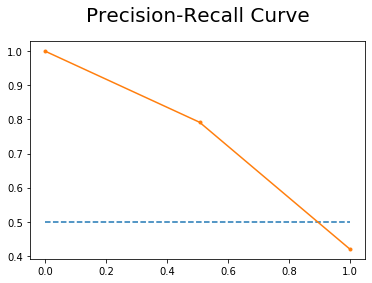

In [28]:
#Plot the precision-recall curve for the model

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
precision, recall, thresholds = precision_recall_curve(y_test, prediction)
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve", pad=20, fontsize=20)
plt.show()

In [29]:
#Calculate AUC value

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('AUC: %.2f' % roc_auc)


AUC: 0.71


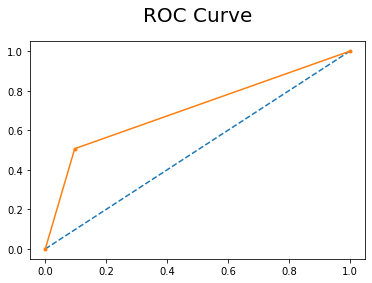

In [30]:
#Plot the ROC curve for the model

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(false_positive_rate, true_positive_rate, marker='.')
plt.title("ROC Curve", pad=20, fontsize=20)
plt.show()

In [31]:
#Set up Decision Tree model in order to classify churn customers.

model_dt = DecisionTreeClassifier()
result = model_dt.fit(x_train, y_train)

In [32]:
#Cross validation 

cv = KFold(n_splits=10, shuffle=False, random_state=42)

for train_index, test_index in cv.split(sample_train_data):
    cv_x_train, cv_x_test = x_train[train_index], x_train[test_index]
    cv_y_train, cv_y_test = y_train[train_index], y_train[test_index]
    
cv_scores = cross_val_score(model_dt, x_train, y_train, cv=10)
    
print("Cross validation scores:", cv_scores)
print("Average of scores: %%%d" % (np.mean(cv_scores*100)))


Cross validation scores: [0.89093065 0.87611144 0.86366331 0.8683274  0.85883749 0.86654804
 0.86002372 0.87781732 0.88493476 0.86824926]
Average of scores: %87


In [33]:
#Test model and calculate accuracy.

prediction = model_dt.predict(x_test)

#Accuracy score is %82 which is an acceptable score.

accuracy_dt = metrics.accuracy_score(y_test, prediction)*100

print("Accuracy score is %%%d." % accuracy_dt)


Accuracy score is %81.


<Figure size 432x288 with 0 Axes>

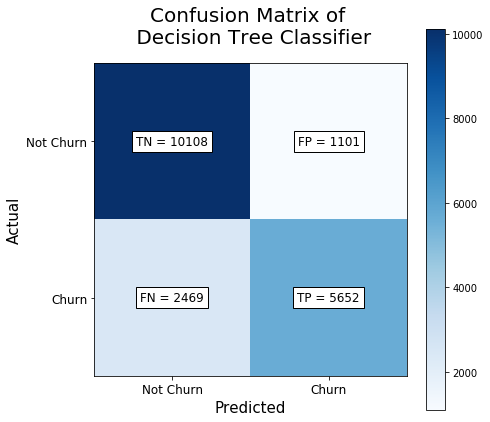

In [34]:
#Confusion matrix

cm = confusion_matrix(y_test, prediction)

plt.clf()

fig=plt.figure(figsize=(7,7))

cax=plt.imshow(cm, interpolation='nearest', cmap="Blues")

fig.colorbar(cax)

classNames = ["Not Churn","Churn"]

plt.title('Confusion Matrix of \n Decision Tree Classifier', pad=20, fontsize=20)

plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)

tick_marks = np.arange(len(classNames))

plt.xticks(tick_marks, classNames, fontsize=12)
plt.yticks(tick_marks, classNames, fontsize=12)

s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment='center',verticalalignment='center',
                 bbox=dict(facecolor='white'), fontsize=12)
plt.show()


In [35]:
#Calculate scores.

print("Precision score is %.2f." % metrics.precision_score(y_test, prediction))
print("Recall score is %.2f." % metrics.recall_score(y_test, prediction))
print("F1 score is %.2f." % metrics.f1_score(y_test, prediction))


Precision score is 0.84.
Recall score is 0.70.
F1 score is 0.76.


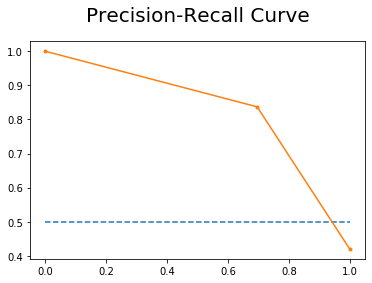

In [36]:
#Plot the precision-recall curve for the model

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
precision, recall, thresholds = precision_recall_curve(y_test, prediction)
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve", pad=20, fontsize=20)
plt.show()

In [37]:
#Calculate AUC value

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('AUC: %.2f' % roc_auc)


AUC: 0.80


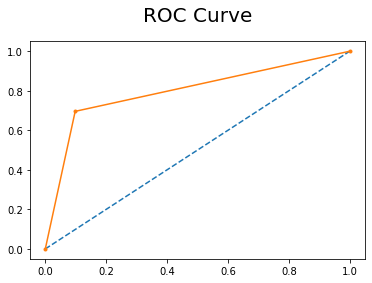

In [38]:
#Plot the ROC curve for the model

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(false_positive_rate, true_positive_rate, marker='.')
plt.title("ROC Curve", pad=20, fontsize=20)
plt.show()

In [39]:
#Set up Random Forest model in order to classify churn customers.

model_rf = RandomForestClassifier()
result = model_rf.fit(x_train, y_train)

C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
#Cross validation 

cv = KFold(n_splits=10, shuffle=False, random_state=42)

for train_index, test_index in cv.split(sample_train_data):
    cv_x_train, cv_x_test = x_train[train_index], x_train[test_index]
    cv_y_train, cv_y_test = y_train[train_index], y_train[test_index]
    
cv_scores = cross_val_score(model_rf, x_train, y_train, cv=10)
    
print("Cross validation scores:", cv_scores)
print("Average of scores: %%%d" % (np.mean(cv_scores*100)))

Cross validation scores: [0.90278601 0.89567279 0.89804386 0.90035587 0.89620403 0.89857651
 0.89086595 0.89323843 0.90332147 0.88961424]
Average of scores: %89


In [41]:
#Test model and calculate accuracy.

prediction = model_rf.predict(x_test)

#Accuracy score is %85 which is an acceptable score.

accuracy_rf = metrics.accuracy_score(y_test, prediction)*100

print("Accuracy score is %%%d." % accuracy_rf)

Accuracy score is %85.


<Figure size 432x288 with 0 Axes>

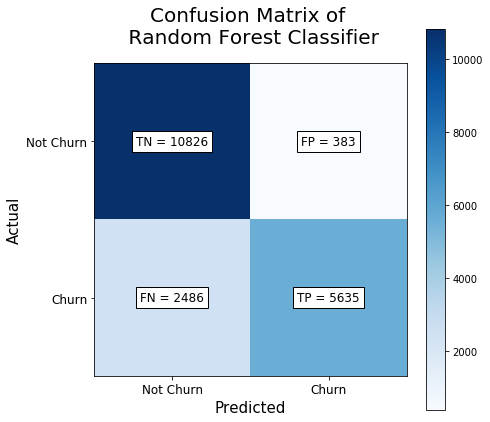

In [42]:
#Confusion matrix

cm = confusion_matrix(y_test, prediction)

plt.clf()

fig=plt.figure(figsize=(7,7))

cax=plt.imshow(cm, interpolation='nearest', cmap="Blues")

fig.colorbar(cax)

classNames = ["Not Churn","Churn"]

plt.title('Confusion Matrix of \n Random Forest Classifier', pad=20, fontsize=20)

plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)

tick_marks = np.arange(len(classNames))

plt.xticks(tick_marks, classNames, fontsize=12)
plt.yticks(tick_marks, classNames, fontsize=12)

s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment='center',verticalalignment='center',
                 bbox=dict(facecolor='white'), fontsize=12)
plt.show()


In [43]:
#Calculate scores.

print("Precision score is %.2f." % metrics.precision_score(y_test, prediction))
print("Recall score is %.2f." % metrics.recall_score(y_test, prediction))
print("F1 score is %.2f." % metrics.f1_score(y_test, prediction))

Precision score is 0.94.
Recall score is 0.69.
F1 score is 0.80.


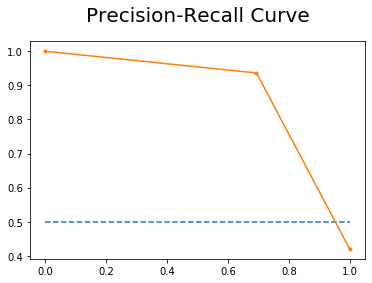

In [44]:
#Plot the precision-recall curve for the model

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
precision, recall, thresholds = precision_recall_curve(y_test, prediction)
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve", pad=20, fontsize=20)
plt.show()


In [45]:
#Calculate AUC value

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('AUC: %.2f' % roc_auc)

AUC: 0.83


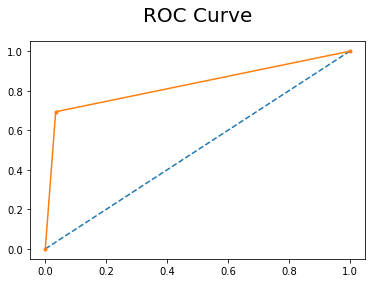

In [46]:
#Plot the ROC curve for the model

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(false_positive_rate, true_positive_rate, marker='.')
plt.title("ROC Curve", pad=20, fontsize=20)
plt.show()

In [52]:
#Set up BaggingClassifier model in order to classify churn customers. AdaBoostClassifier, 
from sklearn.ensemble import BaggingClassifier

In [54]:
# Fitting the BaggingClassifier to the Training set
model_bc = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=10, random_state=0)
result = model_bc.fit(x_train, y_train)


C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

In [55]:
#Cross validation 

cv = KFold(n_splits=10, shuffle=False, random_state=42)

for train_index, test_index in cv.split(sample_train_data):
    cv_x_train, cv_x_test = x_train[train_index], x_train[test_index]
    cv_y_train, cv_y_test = y_train[train_index], y_train[test_index]
    
cv_scores = cross_val_score(model_bc, x_train, y_train, cv=10)
    
print("Cross validation scores:", cv_scores)
print("Average of scores: %%%d" % (np.mean(cv_scores*100)))

C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

C:\Users\budaks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Cross validation scores: [0.91938352 0.90397155 0.89508002 0.90391459 0.90688019 0.90213523
 0.89916963 0.90450771 0.91459075 0.90563798]
Average of scores: %90


In [56]:
#Test model and calculate accuracy.

prediction = model_bc.predict(x_test)

#Accuracy score is %86 which is an acceptable score.

accuracy_bc = metrics.accuracy_score(y_test, prediction)*100

print("Accuracy score is %%%d." % accuracy_bc)

Accuracy score is %86.


<Figure size 432x288 with 0 Axes>

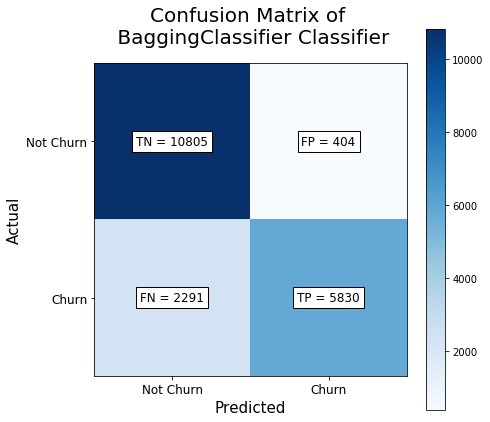

In [57]:
#Confusion matrix

cm = confusion_matrix(y_test, prediction)

plt.clf()

fig=plt.figure(figsize=(7,7))

cax=plt.imshow(cm, interpolation='nearest', cmap="Blues")

fig.colorbar(cax)

classNames = ["Not Churn","Churn"]

plt.title('Confusion Matrix of \n BaggingClassifier Classifier', pad=20, fontsize=20)

plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)

tick_marks = np.arange(len(classNames))

plt.xticks(tick_marks, classNames, fontsize=12)
plt.yticks(tick_marks, classNames, fontsize=12)

s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment='center',verticalalignment='center',
                 bbox=dict(facecolor='white'), fontsize=12)
plt.show()


In [59]:
#Calculate scores.

print("Precision score is %.2f." % metrics.precision_score(y_test, prediction))
print("Recall score is %.2f." % metrics.recall_score(y_test, prediction))
print("F1 score is %.2f." % metrics.f1_score(y_test, prediction))

Precision score is 0.94.
Recall score is 0.72.
F1 score is 0.81.


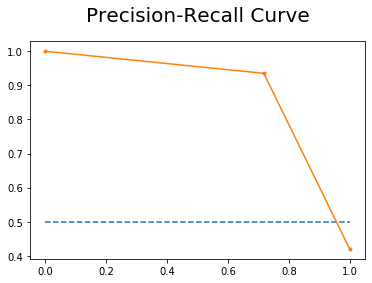

In [60]:
#Plot the precision-recall curve for the model

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
precision, recall, thresholds = precision_recall_curve(y_test, prediction)
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve", pad=20, fontsize=20)
plt.show()


In [61]:
#Calculate AUC value

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('AUC: %.2f' % roc_auc)

AUC: 0.84


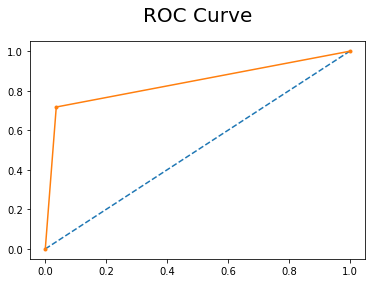

In [62]:
#Plot the ROC curve for the model

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(false_positive_rate, true_positive_rate, marker='.')
plt.title("ROC Curve", pad=20, fontsize=20)
plt.show()

In [65]:
#Set up AdaBoostClassifier model in order to classify churn customers.  
from sklearn.ensemble import AdaBoostClassifier

In [66]:
# Fitting the BaggingClassifier to the Training set
model_ab = AdaBoostClassifier(n_estimators=100, random_state=0)
result = model_ab.fit(x_train, y_train)

In [67]:
#Cross validation 

cv = KFold(n_splits=10, shuffle=False, random_state=42)

for train_index, test_index in cv.split(sample_train_data):
    cv_x_train, cv_x_test = x_train[train_index], x_train[test_index]
    cv_y_train, cv_y_test = y_train[train_index], y_train[test_index]
    
cv_scores = cross_val_score(model_ab, x_train, y_train, cv=10)
    
print("Cross validation scores:", cv_scores)
print("Average of scores: %%%d" % (np.mean(cv_scores*100)))

Cross validation scores: [0.89330172 0.90160047 0.88974511 0.8831554  0.89798339 0.89916963
 0.88849348 0.89501779 0.89976275 0.89198813]
Average of scores: %89


In [68]:
#Test model and calculate accuracy.

prediction = model_ab.predict(x_test)

#Accuracy score is %86 which is an acceptable score.

accuracy_ab = metrics.accuracy_score(y_test, prediction)*100

print("Accuracy score is %%%d." % accuracy_ab)

Accuracy score is %87.


<Figure size 432x288 with 0 Axes>

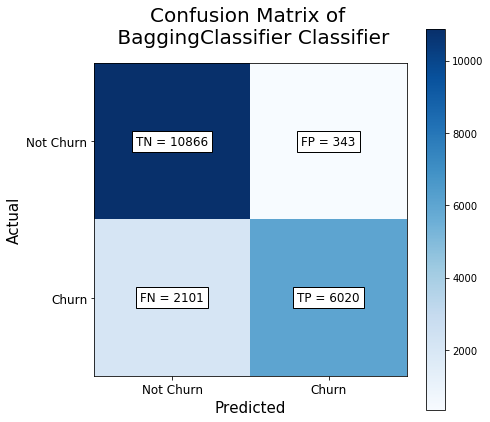

In [69]:
#Confusion matrix

cm = confusion_matrix(y_test, prediction)

plt.clf()

fig=plt.figure(figsize=(7,7))

cax=plt.imshow(cm, interpolation='nearest', cmap="Blues")

fig.colorbar(cax)

classNames = ["Not Churn","Churn"]

plt.title('Confusion Matrix of \n BaggingClassifier Classifier', pad=20, fontsize=20)

plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)

tick_marks = np.arange(len(classNames))

plt.xticks(tick_marks, classNames, fontsize=12)
plt.yticks(tick_marks, classNames, fontsize=12)

s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment='center',verticalalignment='center',
                 bbox=dict(facecolor='white'), fontsize=12)
plt.show()


In [70]:
#Calculate scores.

print("Precision score is %.2f." % metrics.precision_score(y_test, prediction))
print("Recall score is %.2f." % metrics.recall_score(y_test, prediction))
print("F1 score is %.2f." % metrics.f1_score(y_test, prediction))

Precision score is 0.95.
Recall score is 0.74.
F1 score is 0.83.


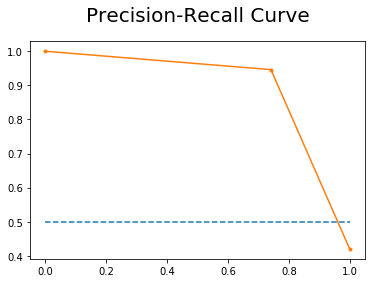

In [71]:
#Plot the precision-recall curve for the model

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
precision, recall, thresholds = precision_recall_curve(y_test, prediction)
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve", pad=20, fontsize=20)
plt.show()

In [72]:
#Calculate AUC value

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('AUC: %.2f' % roc_auc)

AUC: 0.86


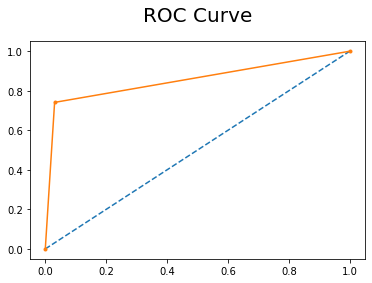

In [73]:
#Plot the ROC curve for the model

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(false_positive_rate, true_positive_rate, marker='.')
plt.title("ROC Curve", pad=20, fontsize=20)
plt.show()

In [74]:
model_list=["Logistic Regression", "Random Forest", "Decision Tree","BaggingClassifier","AdaBoostClassifier"]
accuracy_list = [accuracy_lr,  accuracy_rf,accuracy_dt, accuracy_bc,accuracy_ab]

scores_df = pd.DataFrame()

scores_df["Accuracy"]=accuracy_list
scores_df["Accuracy"]=scores_df["Accuracy"].map('{0:.0f}%'.format)
scores_df.index=model_list

scores_df.sort_values(by=["Accuracy"], ascending=False)

,Accuracy
AdaBoostClassifier,87%
BaggingClassifier,86%
Random Forest,85%
Decision Tree,82%
Logistic Regression,74%


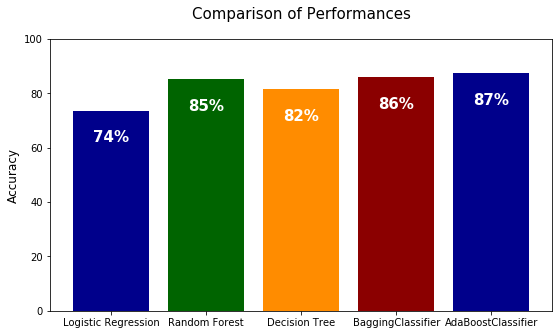

In [89]:
plt.figure(figsize=(9,5))
plt.bar( np.arange(len(scores_df)), accuracy_list, align='center', color=["darkblue", "darkgreen", "darkorange","darkred"])
plt.xticks(np.arange(len(scores_df)), scores_df.index)
plt.ylim((0,100))
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Performances', fontsize=15, pad=20)

for i, v in enumerate(accuracy_list):
    plt.text(i, v-10, scores_df["Accuracy"][i], color='white', fontweight='bold', fontsize=15,
             horizontalalignment='center', verticalalignment='center')

plt.show()